## ANALYZING AIRLINE CUSTOMER SENTIMENT THROUGH SOCIAL MEDIA FEEDBACK

#### AUTHORS

* Jeremiah Waiguru
* Mercy Kiragu
* Paul Ngatia
* Winfred Kinya

## 1.0  PROJECT OVERVIEW

This project aims to analyze customer sentiment expressed on twitter regarding various airlines. By employing Natural Language Processing (NLP) techniques, we will classify customer sentiments and identify key themes in their feedback. The insights derived from this analysis will help airlines enhance their customer service, identify common issues, and improve overall customer satisfaction.

## 1.1  BUSINESS UNDERSTANDING

In the competitive landscape of the airline industry, understanding and managing customer sentiment is crucial for maintaining high levels of customer satisfaction and loyalty. Airlines receive a substantial amount of feedback through various channels such as social media, customer service interactions, and surveys. Analyzing this feedback to discern customer sentiment and predict future trends can provide significant benefits. By proactively addressing customer concerns, airlines can enhance their service quality, optimize operational efficiency, and build a strong reputation. This project seeks to provide airlines with the tools and insights necessary to identify common themes in customer feedback, understand how sentiment evolves over time, and forecast future sentiment trends. These insights will enable airlines to make data-driven decisions that improve customer experiences, resolve issues proactively, and maintain a competitive advantage in the market.

## 1.2  PROBLEM STATEMENT

The airline industry is currently facing a notable decrease in customer satisfaction, leading to unfavorable brand perception and diminished customer loyalty. This decline in satisfaction can be attributed to several factors, including flight delays, inadequate customer service, mishandling of luggage, and other operational inefficiencies. As a result, addressing these customer concerns and enhancing the overall brand perception has become a crucial focus for airlines.

## 1.3  OBJECTIVES

### Primary objective

To analyze customer sentiment towards various airlines through sentiment analysis, providing actionable insights that will enhance customer satisfaction and optimize operational strategies.

### Specific objectives

1.	Implement a real-time monitoring system to continuously capture and process tweets related to airlines from Twitter.
2.	Implement and compare various NLP models (e.g., Logistic Regression ) for sentiment classification.
3.	Generate actionable insights and recommendations based on sentiment analysis to improve customer satisfaction, address pain points, and enhance overall brand reputation. 
4.	Establish an effective response and engagement strategy to manage negative sentiment, address customer complaints, and foster positive customer experiences.


## 2.0  DATA UNDERSTANDING

Our dataset was publicly sourced from crowdflower website and is made up of Twitter users' tweets and retweets. The dataset has 14,640 rows and 20 columns. This Twitter data was collected from February 2015 and contributors were engaged in classifying tweets into categories of positive, negative, and neutral sentiments.

The dataset has 14,640 rows and 20 columns. Below are the columns and their descriptions: 

Unit id  : A unique identifier for each data unit. 

Golden : A boolean value indicating whether the entry is a golden unit in the dataset. 

Unit state : The state of the unit (e.g., golden). 

Trusted judgments : The number of trusted judgments for the entry. 

Last judgment at : Timestamp of the last judgment for the entry. 

Airline sentiment : The target variable, which represents the sentiment of the airline tweet (positive, negative, or neutral).

Airline sentiment confidence: The confidence level associated with the airline sentiment. 

Negative reason : The reason for negative sentiment in the tweet. 

Negative reason confidence: The confidence level associated with the negative sentiment reason.

airline: The airline associated with the tweet. 

Airline sentiment gold: Additional information about airline sentiment (gold 
standard). 

name: The name of the user who posted the tweet. 

Negative reason gold: Additional information about the negative sentiment reason 
(gold standard). 

Retweet count: The number of retweets for the tweet. 

text: The text content of the tweet. 

Tweet cord: Coordinates of the tweet (if available). 

Tweet created: Timestamp of when the tweet was created. 

Tweet id: The unique identifier of the tweet. 

Tweet location: The location associated with the tweet (if provided). 

User time zone: The time zone of the user who posted the tweet. 


## Importimg Necessary Libraries

In [5]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import seaborn as sns
import plotly.express as px 
import re
import string
import joblib

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
# from wordcloud import WordCloud 
from sklearn.metrics import roc_curve, auc

#downloading dependencies
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
# loading the dataset
df = pd.read_csv('Airline-Sentiment-2-w-AA.csv', encoding='latin1')
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


In [7]:
def describe_columns(df):
    # Print column names
    print("Column Names:")
    print(df.columns)

    # Print data types
    print("\nData Types:")
    print(df.dtypes)

    # Print number of rows and columns
    print("\nShape:")
    print(df.shape)

    # Print df information
    print("\nInfo:")
    print(df.info())

    # Print descriptive statistics for numerical columns
    print("\nDescriptive Statistics:")
    print(df.describe())

    # Print missing values count per column
    print("\nMissing Values in percentages:")
    print((df.isna().sum()/len(df)) * 100)

describe_columns(df)

Column Names:
Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'airline_sentiment',
       'airline_sentiment:confidence', 'negativereason',
       'negativereason:confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

Data Types:
_unit_id                          int64
_golden                            bool
_unit_state                      object
_trusted_judgments                int64
_last_judgment_at                object
airline_sentiment                object
airline_sentiment:confidence    float64
negativereason                   object
negativereason:confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     i

The dataset has 14640 rows and 20 columns. It also has missing values, with some columns registering aproximately 90%. This will be dealt with at the preprocessing stage. From our data overview, the text column needs preprocessing since it contains raw tweets with underscores and nametags.

In [8]:
# Checking for duplicates
print('Duplicates:')
print(df.duplicated().sum())
print('\n' )
print('Duplicates in Unit id column:')
print(df.duplicated(subset='_unit_id').sum())

Duplicates:
0


Duplicates in Unit id column:
0


The dataset has no duplicates. 

### **DATA PREPROCESSING**

### A. **Airline data preprocessing** 

### Feature Selection

In [9]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'airline_sentiment',
       'airline_sentiment:confidence', 'negativereason',
       'negativereason:confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [10]:
tweet_df = df[['airline_sentiment', 'text']]
tweet_df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


From our data overview, the text column contains raw tweets with underscores and nametags which will need to be parsed.

In [11]:
def remove_nametags(sentence):
    """A simple function to remove name tags"""
    clean_words = []
    for word in sentence.split():
        if "@" not in word:
            clean_words.append(word)
    return " ".join(clean_words)

tweet_df["text"] = tweet_df["text"].apply(remove_nametags)
tweet_df.head()

,airline_sentiment,text
0,neutral,What said.
1,positive,plus you've added commercials to the experienc...
2,neutral,I didn't today... Must mean I need to take ano...
3,negative,"it's really aggressive to blast obnoxious ""ent..."
4,negative,and it's a really big bad thing about it


In [12]:
# remove numbers
num_pattern = r'[0-9]'
tweet_df['text'] = tweet_df['text'].replace(to_replace=num_pattern, value='', regex=True)
tweet_df.head(10)

,airline_sentiment,text
0,neutral,What said.
1,positive,plus you've added commercials to the experienc...
2,neutral,I didn't today... Must mean I need to take ano...
3,negative,"it's really aggressive to blast obnoxious ""ent..."
4,negative,and it's a really big bad thing about it
5,negative,seriously would pay $ a flight for seats that ...
6,positive,"yes, nearly every time I fly VX this ÛÏear wo..."
7,neutral,Really missed a prime opportunity for Men With...
8,positive,"Well, I didn'tÛ_but NOW I DO! :-D"
9,positive,"it was amazing, and arrived an hour early. You..."


In [13]:
# remove punctuations
tweet_df['text'] = tweet_df['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
# change to lowercase
tweet_df['text'] = tweet_df['text'].apply(lambda x: x.lower())
tweet_df.head(10)

,airline_sentiment,text
0,neutral,what said
1,positive,plus youve added commercials to the experience...
2,neutral,i didnt today must mean i need to take another...
3,negative,its really aggressive to blast obnoxious enter...
4,negative,and its a really big bad thing about it
5,negative,seriously would pay a flight for seats that d...
6,positive,yes nearly every time i fly vx this ûïear wor...
7,neutral,really missed a prime opportunity for men with...
8,positive,well i didntûbut now i do d
9,positive,it was amazing and arrived an hour early youre...


In [14]:
#remove emoticons
def remove_emojis(data):
    """A simple function to remove all emojis"""
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002500-\U00002BEF"
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642" 
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"
                           u"\u3030"
                           "]+", re.UNICODE)
    return re.sub(emoji_pattern, "", data)

tweet_df["text"] = tweet_df["text"].apply(remove_emojis)


In [15]:
def remove_non_standard_char(review):
    """A simple function to remove characters outside the ASCII range"""
    pattern = re.compile(r"[^\x00-\x7F]+")
    clean_string = re.sub(pattern, "", review)
    return clean_string

tweet_df["text"] = tweet_df["text"].apply(remove_non_standard_char)

tweet_df.head(10)

,airline_sentiment,text
0,neutral,what said
1,positive,plus youve added commercials to the experience...
2,neutral,i didnt today must mean i need to take another...
3,negative,its really aggressive to blast obnoxious enter...
4,negative,and its a really big bad thing about it
5,negative,seriously would pay a flight for seats that d...
6,positive,yes nearly every time i fly vx this ear worm w...
7,neutral,really missed a prime opportunity for men with...
8,positive,well i didntbut now i do d
9,positive,it was amazing and arrived an hour early youre...


In [16]:
# remove http tags
urlpattern = r'(?:http)s?\S+'
tweet_df['text'] = tweet_df['text'].str.replace(urlpattern, '')
tweet_df.head()

,airline_sentiment,text
0,neutral,what said
1,positive,plus youve added commercials to the experience...
2,neutral,i didnt today must mean i need to take another...
3,negative,its really aggressive to blast obnoxious enter...
4,negative,and its a really big bad thing about it


In [17]:
# list stopwords
stop_words = set(stopwords.words("english"))
include_stopwords = ["wouldn", "won", "weren", "wasn", "shouldn", "shan", "needn", "mustn",
                     "mightn", "isn", "haven", "hasn", "hadn", "doesn", "didn", "couldn",
                     "aren", "ain", "don", "not"]
stop_words = list(stop_words - set(include_stopwords)) + ['would','youve']

In [18]:
def remove_stopwords(words):
    """A simple function to remove stopwords from a string"""
    clean_words = []
    for word in words.split():
        if word not in stop_words:
            clean_words.append(word)
    return " ".join(clean_words)

tweet_df['text'] = tweet_df['text'].apply(remove_stopwords)
# Print the first 5 rows of the new column
tweet_df.head()

,airline_sentiment,text
0,neutral,said
1,positive,plus added commercials experience tacky
2,neutral,didnt today must mean need take another trip
3,negative,really aggressive blast obnoxious entertainmen...
4,negative,really big bad thing


Stopwords occur frequently in texts but provide little semantic value. By removing them, we eliminate unnecessary noise and focus on the more important words, thus improving the efficiency and effectiveness of our models. We customized our stopword list to include stopwords which we felt negates the sentiments.

#### Stemming

In [19]:
stemmer = SnowballStemmer("english")
#lemmatizer = WordNetLemmatizer()
def stem_words(review):
    """A function to stem words in a review text"""
    stem_words = []
    for word in review.split():
        stem_word = stemmer.stem(word)
        stem_words.append(stem_word)
    return " ".join(stem_words)

tweet_df["text"] = tweet_df["text"].apply(stem_words)
tweet_df.head(10)

,airline_sentiment,text
0,neutral,said
1,positive,plus ad commerci experi tacki
2,neutral,didnt today must mean need take anoth trip
3,negative,realli aggress blast obnoxi entertain guest fa...
4,negative,realli big bad thing
5,negative,serious pay flight seat didnt play realli bad ...
6,positive,yes near everi time fli vx ear worm wont go away
7,neutral,realli miss prime opportun men without hat par...
8,positive,well didntbut
9,positive,amaz arriv hour earli your good


In [20]:
def impactful_words_positive(review, num_words=2):
    """Function that gets the most impactful words in positive reviews"""
    tokens = nltk.word_tokenize(review)
    sia = SentimentIntensityAnalyzer()
    scores = {token: sia.polarity_scores(token)["compound"] for token in tokens}
    sorted_words =  sorted(scores.items(), key=lambda x: x[1], reverse=True)
    impactful_words = [word for word, score in sorted_words][:num_words]
    return list(impactful_words)

In [21]:
def impactful_words_negative(review, num_words=2):
    """Function that gets the most impactful words in negative reviews"""
    tokens = nltk.word_tokenize(review)
    sia = SentimentIntensityAnalyzer()
    scores = {token: sia.polarity_scores(token)["compound"] for token in tokens}
    impactful_words = [(word, score) for word, score in scores.items() if score < 0]
    sorted_words =  sorted(impactful_words, key=lambda x: np.abs(x[1]), reverse=True)
    impactful_words = [word for word, score in sorted_words][:num_words]
    return list(impactful_words)
    

In [22]:
# Subsetting the sentiments into positive, negative and neutral.
neg_df = tweet_df[tweet_df['airline_sentiment']=='negative']
pos_df = tweet_df[tweet_df['airline_sentiment']=='positive']
neu_df = tweet_df[tweet_df['airline_sentiment']=='neutral']

In [23]:
pos_df['impactful_words'] = pos_df['text'].apply(impactful_words_positive)
neg_df['impactful_words'] = neg_df['text'].apply(impactful_words_negative)

In [24]:
pos_df.head()

,airline_sentiment,text,impactful_words
1,positive,plus ad commerci experi tacki,"[plus, ad]"
6,positive,yes near everi time fli vx ear worm wont go away,"[yes, near]"
8,positive,well didntbut,"[well, didntbut]"
9,positive,amaz arriv hour earli your good,"[good, amaz]"
11,positive,lt pretti graphic much better minim iconographi,"[better, lt]"


In [25]:
neg_df.head()

,airline_sentiment,text,impactful_words
3,negative,realli aggress blast obnoxi entertain guest fa...,[aggress]
4,negative,realli big bad thing,[bad]
5,negative,serious pay flight seat didnt play realli bad ...,"[bad, pay]"
15,negative,sfopdx schedul still mia,[mia]
17,negative,flew nyc sfo last week couldnt fulli sit seat ...,[]


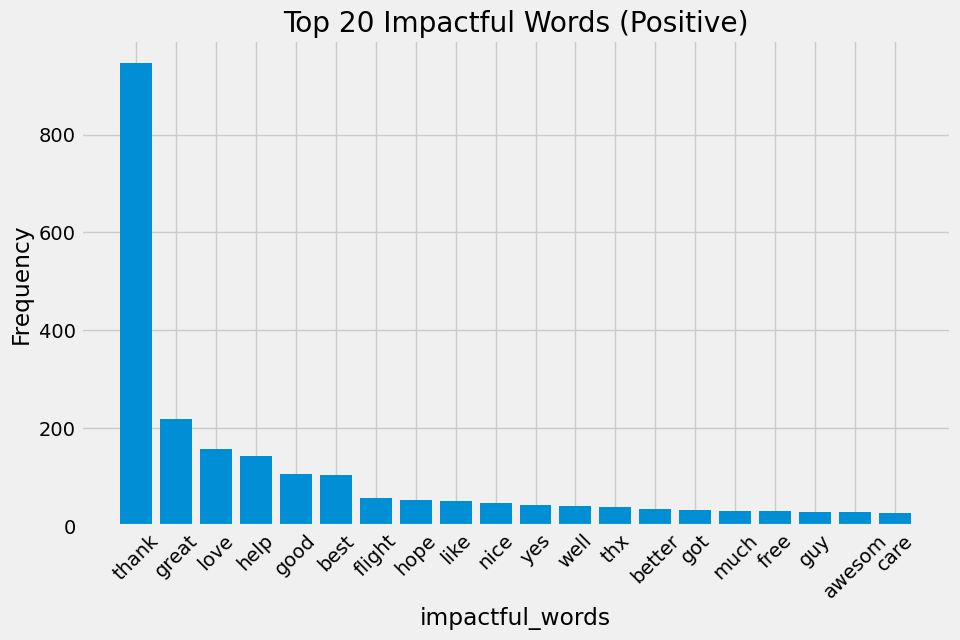

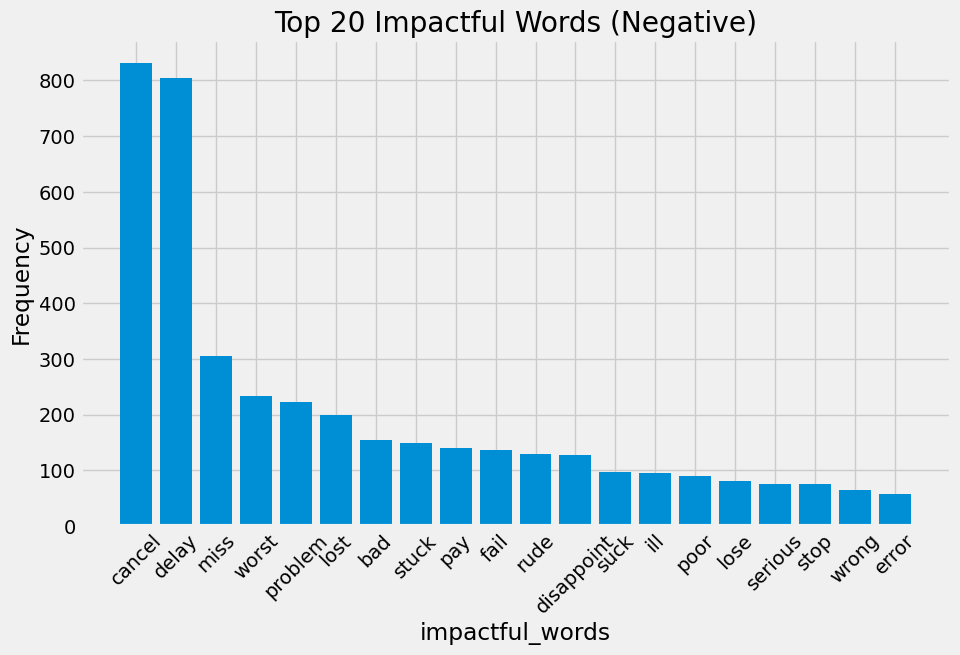

In [26]:
def plot_top_words(df, category, num_words=20, column='impactful_words'):
    # Flatten the list of impactful words
    words_flat = np.concatenate(df[column].values)
    
    # Calculate the word frequencies
    word_counts = np.unique(words_flat, return_counts=True)
    
    # Sort the words and counts in descending order
    sorted_indices = np.argsort(word_counts[1])[::-1]
    sorted_words = word_counts[0][sorted_indices]
    sorted_counts = word_counts[1][sorted_indices]
    
    # Select the top N words
    top_words = sorted_words[:num_words]
    top_counts = sorted_counts[:num_words]
    
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(top_words, top_counts)
    
    # Set labels and title
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Top {num_words} Impactful Words ({category})')
    
    # Rotate x-axis labels if needed
    plt.xticks(rotation=45)
    
    # # Generate word cloud
    # wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(top_words, top_counts)))
    
    # # Plot the word cloud
    # plt.figure(figsize=(10, 6))
    # plt.imshow(wordcloud, interpolation='bilinear')
    # plt.axis('off')
    # plt.title(f'Top {num_words} Impactful Words Word Cloud ({category})')
    
    # # Display the plots
    # plt.tight_layout()
    # plt.show()

# Plot top impactful words and word cloud for positive reviews
plot_top_words(pos_df, 'Positive')

# Plot top impactful words and word cloud for negative reviews
plot_top_words(neg_df, 'Negative')


From our sentiment analysis, we came up with the plots and wordclouds of the most impactful words to our reviews being negative or positive. From this we can see that cancelled, delayed and missed flights are the main painpoints.